In [4]:
import grabbers
import asyncio
import networkx as nx
import matplotlib.pyplot as plt
import os
import sqlite3

In [1]:
def create_database(conn):
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS edges (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name1 TEXT NOT NULL,
            name2 TEXT NOT NULL,
            weight INT NOT NULL
        )
    ''')

In [ ]:
async def main():
    conn = sqlite3.connect("edge_database.db")
    create_database(conn)
    # ask for username then create an object of the player
    name = input("Enter the username of the player you want to add. Example: Khazicus#9648: ")
    player = grabbers.RootPlayer(name)
    await player.setup()

    # for element in root_user_sorted:
    #     print(root_user_sorted[element][0] + " : " + str(root_user_sorted[element][1]))
    print(player.players_raided_with)
    g = nx.Graph()
    for connection in player.players_raided_with:
        g.add_edge(player.bungie_name, player.players_raided_with[connection][0], weight=player.players_raided_with[connection][1])
    nx.draw(g,with_labels=True)

    print("Nodes:", g.nodes())
    print("Edges:", g.edges())

    plt.show()

    for other_player in player.players_raided_with:
        try:
            print(player.players_raided_with[other_player][0])
            player_obj = grabbers.AdjacentPlayer(player.players_raided_with[other_player][0], other_player, player.players_raided_with[other_player][2])
            await player_obj.setup()
            # new_sort = dict(sorted(player_obj.players_raided_with.items(), key=lambda x: x[1][1], reverse=True))
            # full_user_dict[player_obj.bungie_name] = new_sort
            for connection in player_obj.players_raided_with:
                g.add_edge(player_obj.bungie_name, player_obj.players_raided_with[connection][0], weight=player_obj.players_raided_with[connection][1])
            
            print("Nodes:", g.nodes())
            print("Edges:", g.edges())
            
        except:
            print(f"failed to get data for {player.players_raided_with[other_player][0]}")

    nx.draw(g,with_labels=True)
    plt.show()

In [ ]:
async def search_for_players(depth, root_user):
    if depth == 0:
        return
    for other_player in root_user.players_raided_with:
        print(root_user.players_raided_with[other_player][0])
        adjacent_player = grabbers.AdjacentPlayer(root_user.players_raided_with[other_player][0], other_player, root_user.players_raided_with[other_player][2])
        await adjacent_player.setup()


khazicus 9648
{'4611686018453633365': ['zealand12b#3184', 36, 2], '4611686018517092168': ['Hypwr#8749', 122, 3], '4611686018516904660': ['Lunar#0270', 107, 3], '4611686018442826738': ['SoulReturn#6095', 68, 2], '4611686018460908005': ['big guy.#1314', 8, 2], '4611686018431607955': ['Farva#3282', 7, 1], '4611686018436479266': ['Brightest_Day#9082', 2, 1], '4611686018483723424': ['burr#0105', 77, 3], '4611686018456291382': ['Uncle Iroh#9531', 2, 2], '4611686018476686275': ['Boony ♡#0966', 15, 1], '4611686018527638905': ['namenroodles#9539', 43, 3], '4611686018428884323': ['ryan#9443', 77, 2], '4611686018463706282': ['Rose, A Court Of Thorns#7196', 1, 1], '4611686018476253541': ['Stealth, The Rizzlation ッ#2233', 1, 1], '4611686018511354759': ['SteadySweaty#8865', 1, 3], '4611686018467487748': ['Sparrowwwwwwwww#7900', 52, 3], '4611686018491602250': ['Nacrova#4142', 3, 3], '4611686018473998478': ['Maverick#6872', 1, 1], '4611686018467783384': ['Kirati#8535', 1, 3], '4611686018472819428': ['

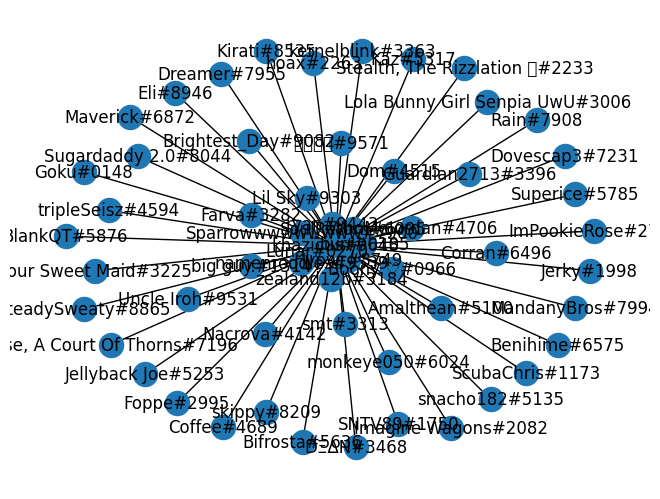

Hypwr#8749
Hypwr#8749 4611686018517092168 3
Nodes: ['khazicus#9648', 'zealand12b#3184', 'Hypwr#8749', 'Lunar#0270', 'SoulReturn#6095', 'big guy.#1314', 'Farva#3282', 'Brightest_Day#9082', 'burr#0105', 'Uncle Iroh#9531', 'Boony ♡#0966', 'namenroodles#9539', 'ryan#9443', 'Rose, A Court Of Thorns#7196', 'Stealth, The Rizzlation ッ#2233', 'SteadySweaty#8865', 'Sparrowwwwwwwww#7900', 'Nacrova#4142', 'Maverick#6872', 'Kirati#8535', 'Corran#6496', 'Guardian2713#3396', 'Foppe#2995', 'Amalthean#5100', 'WhoMeJordan#4706', 'SNTV89#1750', 'Benihime#6575', 'ImPookieRose#2735', 'Jellyback Joe#5253', 'Bifrosta#5636', 'Dreamer#7955', 'DΞΔN#3468', 'kernelblink#3363', 'hoax#2263', 'Dovescap3#7231', 'Jerky#1998', 'BlankQT#5876', 'Your Sweet Maid#3225', 'Sugardaddy 2.0#8044', 'Lola Bunny Girl Senpia UwU#3006', 'skippy#8209', 'Goku#0148', 'Coffee#4689', 'Imagine Wagons#2082', 'Lil Sky#9303', 'ScubaChris#1173', 'Rain#7908', 'monkeye050#6024', 'smt#3313', 'Kaz#5317', 'Eli#8946', 'Dom#4515', '美国之死#9571', 'snac

c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-package

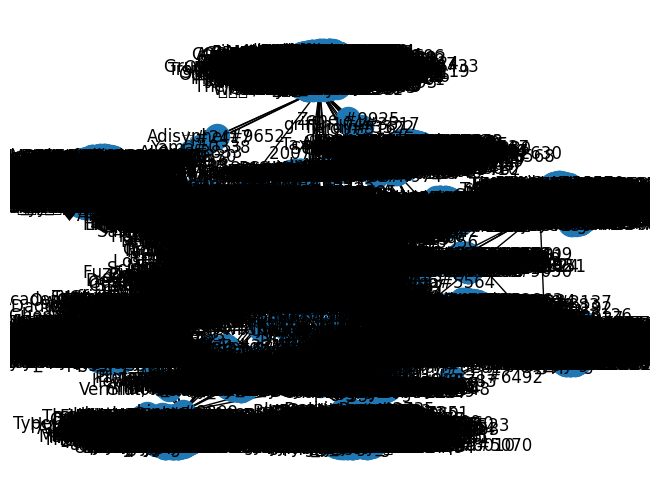

In [6]:
await main()